# Implementation of Decision Tree

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

import graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints', 'DecisionTree Practice.ipynb', 'hr_job.csv']

In [3]:
R = "\033[0m"

B = "\033[1m"
I = "\033[3m"
U = "\033[4m"

# Foreground Colors ..
Black = "\033[30m"
Red = "\033[31m"
Green = "\033[32m"
Yellow = "\033[33m"
Blue = "\033[34m"
Magenta = "\033[35m"
Cyan = "\033[36m"
White = "\033[37m"

# Background Colors ..
Black_B = "\033[40m"
Red_B = "\033[41m"
Green_B = "\033[42m"
Yellow_B = "\033[43m"
Blue_B = "\033[44m"
Magenta_B = "\033[45m"
Cyan_B = "\033[46m"
White_B = "\033[47m"

In [4]:
data = pd.read_csv('hr_job.csv')

In [5]:
data.head(5)

ID  city  city_development_index  gender  relevent_experience  \
0   1    21                0.624000       1                    0   
1   2    21                0.616795       1                    0   
2   3    73                0.754000       1                    0   
3   4    57                0.866000       1                    0   
4   5    21                0.624000       1                    1   

   enrolled_university  education_level  major_discipline  experience  \
0                  2.0              3.0               4.0         3.0   
1                  2.0              3.0               4.0         0.0   
2                  2.0              3.0               4.0         0.0   
3                  0.0              5.0               4.0         9.0   
4                  0.0              4.0               4.0         5.0   

   company_size  company_type  last_new_job  training_hours  target  
0           NaN           4.0           0.0       31.372145       1  
1           NaN           NaN           1.0       63.988905       1  
2           NaN           NaN           0.0       19.000000       1  
3           4.0           4.0           5.0       53.000000       0  
4           3.0           4.0           5.0      108.000000       1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17257 entries, 0 to 17256
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      17257 non-null  int64  
 1   city                    17257 non-null  int64  
 2   city_development_index  17257 non-null  float64
 3   gender                  17257 non-null  int64  
 4   relevent_experience     17257 non-null  int64  
 5   enrolled_university     17006 non-null  float64
 6   education_level         16962 non-null  float64
 7   major_discipline        15441 non-null  float64
 8   experience              17161 non-null  float64
 9   company_size            9603 non-null   float64
 10  company_type            9982 non-null   float64
 11  last_new_job            16928 non-null  float64
 12  training_hours          17257 non-null  float64
 13  target                  17257 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 

In [7]:
data.isnull().sum()

ID                           0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        251
education_level            295
major_discipline          1816
experience                  96
company_size              7654
company_type              7275
last_new_job               329
training_hours               0
target                       0
dtype: int64

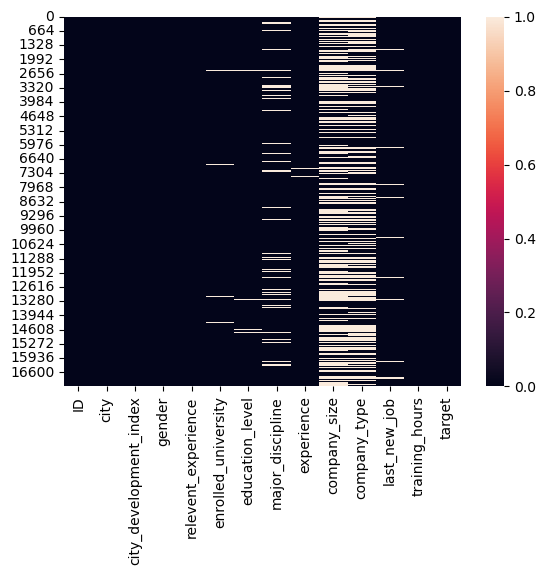

In [8]:
sns.heatmap(data.isnull())
plt.show()

In [9]:
print(f"{B}Feature\t\t\tNULL Values{R}")
print(f"-------------------------------------")
null_percentages = data.isnull().mean() * 100
null_percentages = null_percentages[null_percentages > 0].sort_values(ascending=False)
for feature, null_count in null_percentages.items():
    #null_percent = (null_count * 100) / data.shape[0]
    if null_count > 10:
        print(f"{B}{feature:<20}  :  {null_count:.2f} %{R}")
    else:
        print(f"{feature:<20}  :  {null_count:.2f} %")

Feature			NULL Values
-------------------------------------
company_size          :  44.35 %
company_type          :  42.16 %
major_discipline      :  10.52 %
last_new_job          :  1.91 %
education_level       :  1.71 %
enrolled_university   :  1.45 %
experience            :  0.56 %


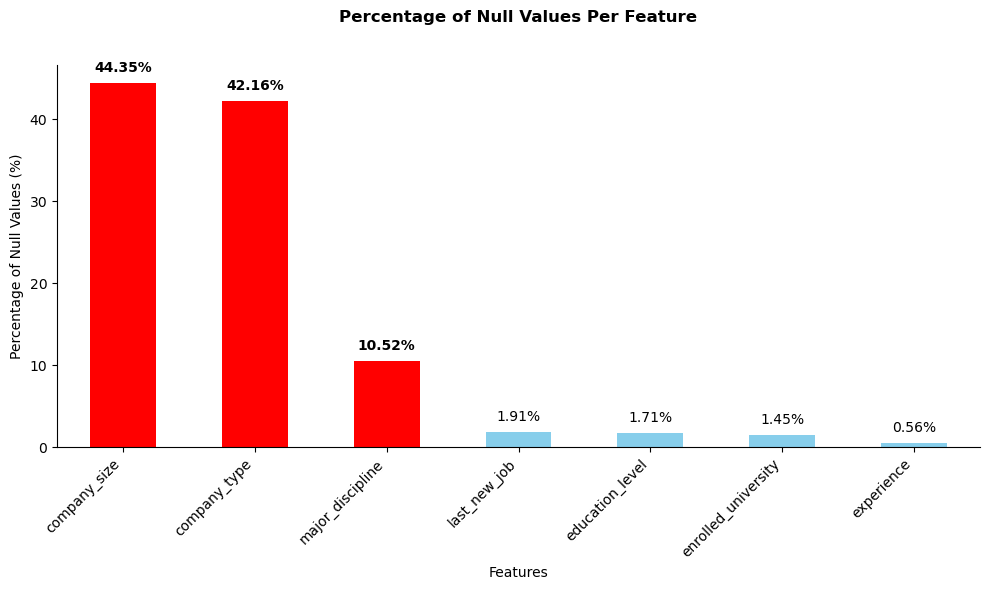

In [10]:
colors = ['red' if p > 10 else 'skyblue' for p in null_percentages]
ax = null_percentages.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Percentage of Null Values Per Feature\n\n', fontweight = 'bold')
plt.xlabel('Features')
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(null_percentages):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold' if v > 10 else 'normal')
plt.tight_layout()
sns.despine()
plt.show()

#### Dropping features with ~ 40% or more missing values & 'id'

In [11]:
data.drop(['company_size', 'company_type', 'ID'], axis = 1, inplace = True)

In [12]:
print(data.columns)

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'last_new_job', 'training_hours', 'target'],
      dtype='object')


In [13]:
data.describe().T

count       mean        std    min    25%  \
city                    17257.0  72.991887  46.128232  1.000  21.00   
city_development_index  17257.0   0.805103   0.128002  0.448   0.68   
gender                  17257.0   0.828417   0.488328  0.000   1.00   
relevent_experience     17257.0   0.710726   0.453438  0.000   0.00   
enrolled_university     17006.0   0.476891   0.825014  0.000   0.00   
education_level         16962.0   3.108183   0.582475  1.000   3.00   
major_discipline        15441.0   3.888543   0.581960  0.000   4.00   
experience              17161.0  10.532370   8.291935  0.000   4.00   
last_new_job            16928.0   1.794542   1.582556  0.000   1.00   
training_hours          17257.0  63.974366  57.102777  1.000  24.00   
target                  17257.0   0.499971   0.500014  0.000   0.00   

                              50%         75%      max  
city                    83.000000  103.000000  180.000  
city_development_index   0.874349    0.920000    0.949  
gender                   1.000000    1.000000    2.000  
relevent_experience      1.000000    1.000000    1.000  
enrolled_university      0.000000    1.000000    2.000  
education_level          3.000000    3.000000    5.000  
major_discipline         4.000000    4.000000    5.000  
experience               8.000000   15.000000   25.000  
last_new_job             1.000000    2.000000    5.000  
training_hours          46.669853   85.425166  336.000  
target                   0.000000    1.000000    1.000

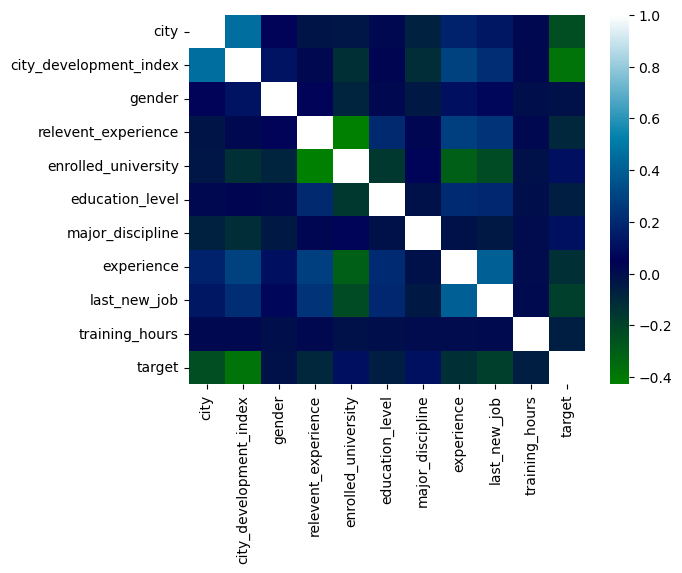

In [14]:
sns.heatmap(data.corr(), cmap = 'ocean')
plt.show()

In [15]:
data.corr()['target'].sort_values(ascending = False)

target                    1.000000
major_discipline          0.110248
enrolled_university       0.101998
gender                   -0.015329
training_hours           -0.055487
education_level          -0.064119
relevent_experience      -0.096142
experience               -0.128129
last_new_job             -0.186839
city                     -0.240451
city_development_index   -0.381715
Name: target, dtype: float64

In [16]:
check_feature_relation = [
    'experience',
    'training_hours',
    'last_new_job',
    'city_development_index',
    'enrolled_university'
]

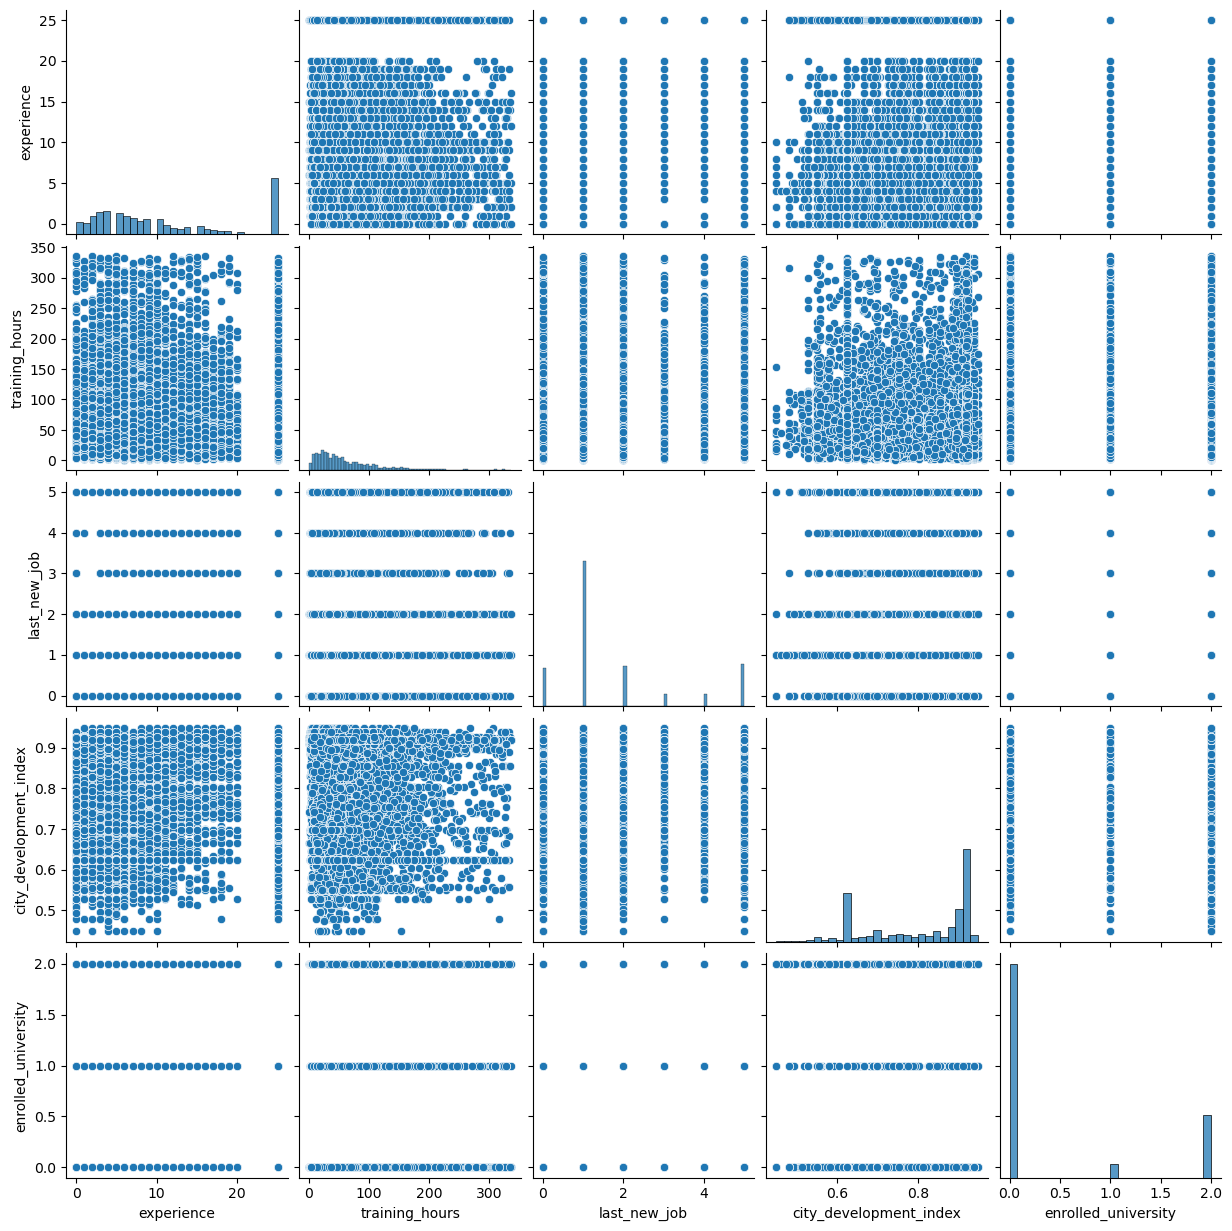

In [17]:
sns.pairplot(data[check_feature_relation])
plt.show()

In [18]:
fig = ex.histogram(
                    data,
                    marginal = 'box',
                    x = 'training_hours',
                    color = 'target'
)
fig.update_layout(bargap = 0.3)

As noticed in `data.describe()` method, **`education_level`** has the same value for quartile range, so will fill the empty values with median value.

In [19]:
data.education_level.fillna(3.0, inplace = True)

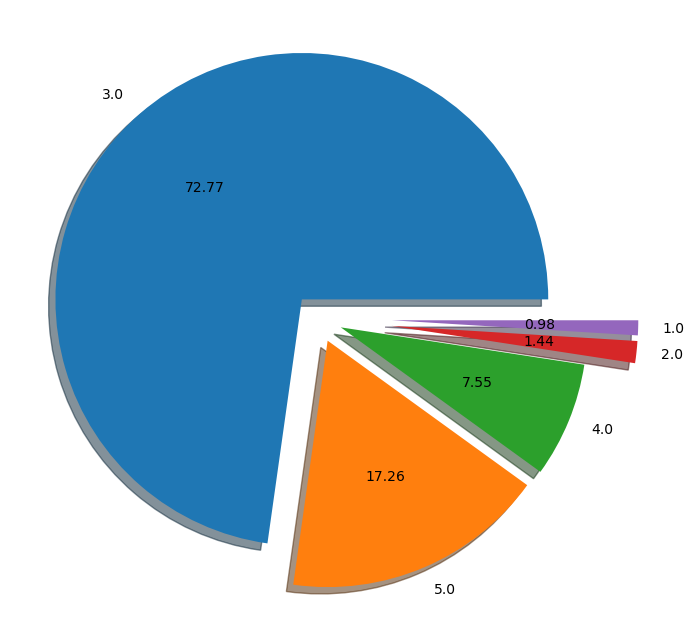

In [20]:
plt.figure(figsize = (15, 8))
plt.pie(
    data['education_level'].value_counts(),
    labels = data['education_level'].unique(),
    shadow = True,
    autopct = '%.2f',
    explode = [0.1, 0.1, 0.1, 0.3, 0.3]
)
plt.show()

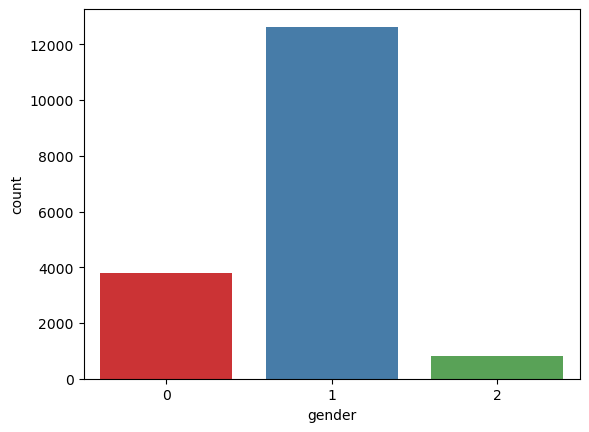

In [21]:
sns.countplot(data = data, x = 'gender', palette = 'Set1')
plt.show()

In [22]:
data['relevent_experience'].unique()

array([0, 1], dtype=int64)

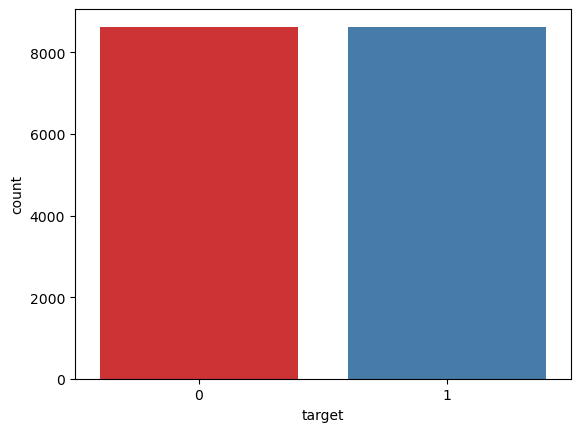

In [23]:
sns.countplot(data = data, x = 'target', palette = 'Set1')
plt.show()

In [24]:
fig = ex.histogram(
                    data,
                    marginal = 'box',
                    x = 'city_development_index',
                    color = 'target'
)
fig.update_layout(bargap = 0.3)

## Implementing Decision Tree

In [25]:
features = [
    'experience',
    'training_hours',
    'last_new_job',
    'city',
    'relevent_experience',
]

In [26]:
X = data[features]
X_copy = X.copy()

Y = data['target']
Y_copy = Y.copy()

In [27]:
X.fillna(method = 'ffill', inplace = True)

In [28]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [30]:
model = DecisionTreeClassifier(max_depth = 15, max_features = 5, splitter = 'best', criterion = 'gini')
model = model.fit(x_train, y_train)

In [31]:
class_names = ['0', '1']

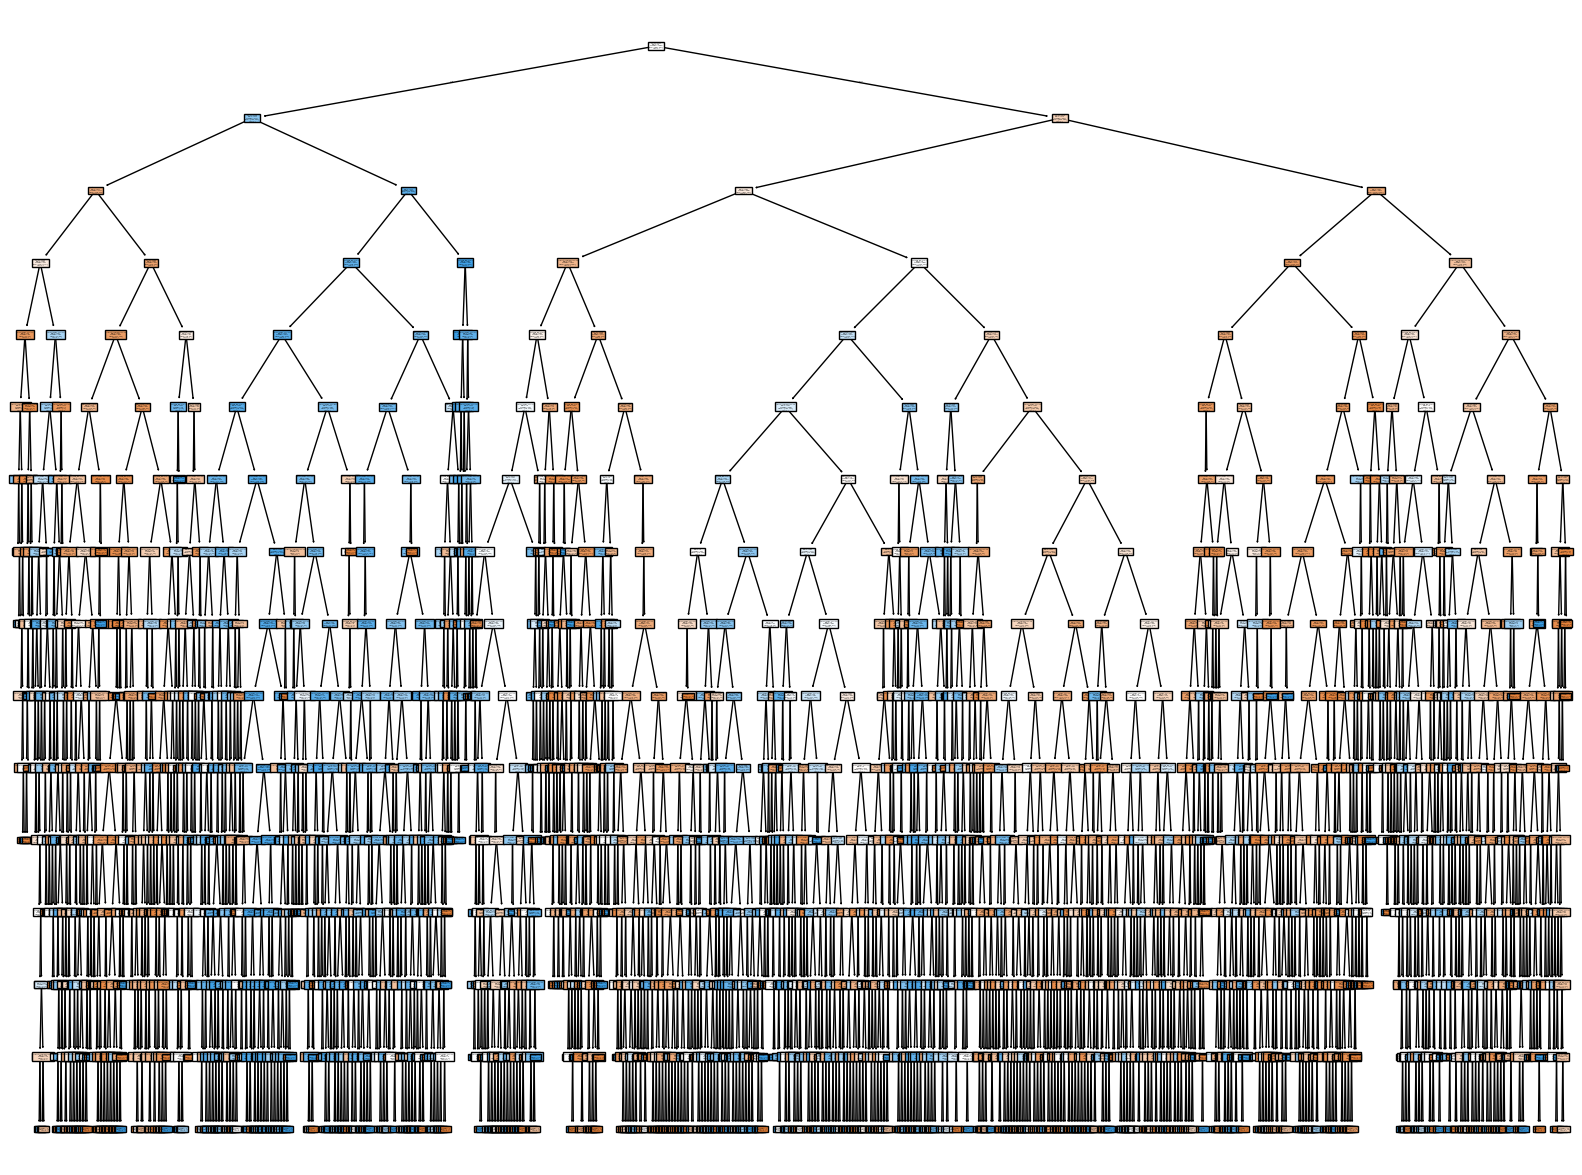

In [32]:
plt.figure(figsize = (20, 15))
plot_tree(model,
         feature_names = X_copy.columns,
         class_names = class_names,
         filled = True)
plt.show()

Based on the `gini` index computations, a decision tree assigns an '**importance**' value to each feature. These values can be used to interpret the results given by a decision tree.

In [33]:
n = 3 # This needs to be changed to visually check the top 'n' features ..

feature_importances = list(model.feature_importances_)
print(f"\n{B}Feature Importances -{R}\n")
for feature, importance in zip(features, feature_importances):
    if importance in sorted(feature_importances, reverse = True)[:n]:
        print(f"{feature:<20} : {B}{Red}{importance}{R}")
    else:
        print(f"{feature:<20} : {R}{Cyan}{importance}{R}")


Feature Importances -

experience           : 0.13916406155113456
training_hours       : 0.2968334363020261
last_new_job         : 0.07814129909092224
city                 : 0.45442685316385795
relevent_experience  : 0.031434349892059094


In [ ]:
from sklearn import tree

explore_decision_tree = tree.export_text(model)
print(explore_decision_tree)

In [37]:
import graphviz

graph = tree.export_graphviz(model)

graph_plot = graphviz.Source(graph, format = 'png')
graph_plot.render('decision_tree', view=False)
graph_plot

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.283889 to fit


In [38]:
model.classes_

array([0, 1], dtype=int64)

In [43]:
y_pred = model.predict(x_test)

## Evaluation Metrics

In [49]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_true = y_test, y_pred = y_pred)

print(f"The accuracy score of the model is found to be : {B}{accuracy}{R}")
print(f"The f1 score of the model is found to be       : {B}{f1}{R}")
print(f"The recall score of the model is found to be   : {B}{recall}{R}")

The accuracy score of the model is found to be : 0.7065469293163383
The f1 score of the model is found to be       : 0.7079850100893629
The recall score of the model is found to be   : 0.7164527421236873


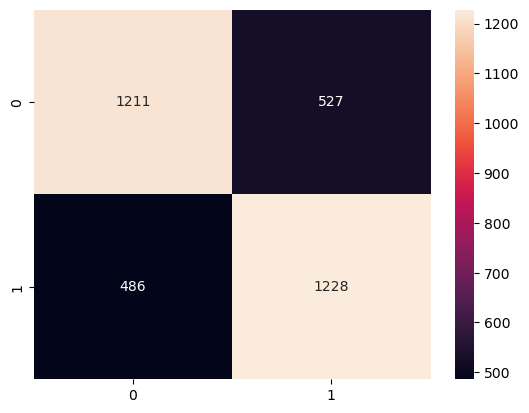

In [56]:
sns.heatmap(confusion_matrix(y_pred = y_pred, y_true = y_test), annot = True, fmt = 'g')
plt.show()